# PCA 

# 0. 모듈 불러오기 

In [1]:
# 데이터 구성 패키지 : Series, DataFrame
import pandas as pd

# 행렬 연산 패키지 
import numpy as np

# matplotlib 불러오기 
import matplotlib
import matplotlib.pyplot as plt

# 데이터 시각화 : 추세, 산점도 행렬
import seaborn as sns

# Scale 변환 : 평균, 표준편차 기준
from sklearn.preprocessing import StandardScaler 

# 주성분 분석 
from sklearn.decomposition import PCA

# 회귀 분석 
import statsmodels.api as sm

# 한글 깨짐 방지
import matplotlib.font_manager as fm 
font_list=[font.name for font in fm.fontManager.ttflist]
font_list
plt.rcParams['font.family']='NanumBarunGothic'

# 1. 데이터 불러오기 

In [2]:
df_raw=pd.read_csv("/home/piai/Downloads/3/유방암.csv", engine='python')
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 1-1 데이터 분리 (Y, Xs)-> 설명변수를 이용한 주성분 분석 

In [8]:
df_raw_x=df_raw.drop("diagnosis",axis=1)
df_raw_y=df_raw["diagnosis"]
df_raw_x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df_raw_y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

#### 데이터는 유방암 검사를 받은 사람들의 유방암 확진 여부와 종양의 특징에 대해 기술하고 있다. 유방 종양의 특징 (크기, 위치, 형상 등)과 유방암 확진의 상관관계를 파악하기 위해, 목표변수를 "diagonsis"로 확정하였고, 나머지 변수들과의 관계를 파악하며, 유방암으로 판단할 수 있는 유방 종양의 특징을 가려내는 것을 분석 목표로 한다. 

# 2. 선형관계 확인 : 산점도 및 상관계수

### 2-1 산점도 행렬 (변수가 너무 많아서 생략) 

### 2-2 Pearson 상관계수 : pearson,  kendall, spearman

In [6]:
df_raw_x.corr().round(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000,0.324,0.998,0.987,0.171,0.506,0.677,0.823,0.148,-0.312,...,0.970,0.297,0.965,0.941,0.120,0.413,0.527,0.744,0.164,0.007
mean texture,0.324,1.000,0.330,0.321,-0.023,0.237,0.302,0.293,0.071,-0.076,...,0.353,0.912,0.358,0.344,0.078,0.278,0.301,0.295,0.105,0.119
mean perimeter,0.998,0.330,1.000,0.987,0.207,0.557,0.716,0.851,0.183,-0.261,...,0.969,0.303,0.970,0.942,0.151,0.456,0.564,0.771,0.189,0.051
mean area,0.987,0.321,0.987,1.000,0.177,0.499,0.686,0.823,0.151,-0.283,...,0.963,0.287,0.959,0.959,0.124,0.390,0.513,0.722,0.144,0.004
mean smoothness,0.171,-0.023,0.207,0.177,1.000,0.659,0.522,0.554,0.558,0.585,...,0.213,0.036,0.239,0.207,0.805,0.472,0.435,0.503,0.394,0.499
mean compactness,0.506,0.237,0.557,0.499,0.659,1.000,0.883,0.831,0.603,0.565,...,0.535,0.248,0.590,0.510,0.566,0.866,0.816,0.816,0.510,0.687
mean concavity,0.677,0.302,0.716,0.686,0.522,0.883,1.000,0.921,0.501,0.337,...,0.688,0.300,0.730,0.676,0.449,0.755,0.884,0.861,0.409,0.515
mean concave points,0.823,0.293,0.851,0.823,0.554,0.831,0.921,1.000,0.462,0.167,...,0.830,0.293,0.856,0.810,0.453,0.667,0.752,0.910,0.376,0.369
mean symmetry,0.148,0.071,0.183,0.151,0.558,0.603,0.501,0.462,1.000,0.480,...,0.186,0.091,0.219,0.177,0.427,0.473,0.434,0.430,0.700,0.438
mean fractal dimension,-0.312,-0.076,-0.261,-0.283,0.585,0.565,0.337,0.167,0.480,1.000,...,-0.254,-0.051,-0.205,-0.232,0.505,0.459,0.346,0.175,0.334,0.767


#### 유방 종양의 특징들 사이의 상관관계를 알 수 있다. 

# 3. 데이터 확인 및 Scaling 

### 3-1 요약 통계량 -> Scale 변환 필요 확인

In [10]:
df_raw_x.describe().round(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,14.127,19.290,91.969,654.889,0.096,0.104,0.089,0.049,0.181,0.063,...,16.269,25.677,107.261,880.583,0.132,0.254,0.272,0.115,0.290,0.084
std,3.524,4.301,24.299,351.914,0.014,0.053,0.080,0.039,0.027,0.007,...,4.833,6.146,33.603,569.357,0.023,0.157,0.209,0.066,0.062,0.018
min,6.981,9.710,43.790,143.500,0.053,0.019,0.000,0.000,0.106,0.050,...,7.930,12.020,50.410,185.200,0.071,0.027,0.000,0.000,0.156,0.055
25%,11.700,16.170,75.170,420.300,0.086,0.065,0.030,0.020,0.162,0.058,...,13.010,21.080,84.110,515.300,0.117,0.147,0.114,0.065,0.250,0.071
50%,13.370,18.840,86.240,551.100,0.096,0.093,0.062,0.034,0.179,0.062,...,14.970,25.410,97.660,686.500,0.131,0.212,0.227,0.100,0.282,0.080
75%,15.780,21.800,104.100,782.700,0.105,0.130,0.131,0.074,0.196,0.066,...,18.790,29.720,125.400,1084.000,0.146,0.339,0.383,0.161,0.318,0.092
max,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,...,36.040,49.540,251.200,4254.000,0.223,1.058,1.252,0.291,0.664,0.208


#### 평균 값을 확인한 결과, 변수들의 값이 0점대에서 수백대까지 다양한 범위를 보임을 알 수 있다. 이에 Scale 변환을 하기로 하였다. 

### 3-2 변수 이름 저장

In [11]:
x_cols=df_raw_x.columns

### 3-3 Scale 변환 : ndarray 형식

In [13]:
scaler=StandardScaler()
nd_scaled=scaler.fit_transform(df_raw_x)

### 3-4 변환된 데이터 및 형택 확인

In [14]:
print("Scaled Data: \n{}".format(nd_scaled[:5].round(3)))
print("Shape: \n{}".format(nd_scaled.shape))

Scaled Data: 
[[ 1.097e+00 -2.073e+00  1.270e+00  9.840e-01  1.568e+00  3.284e+00
   2.653e+00  2.532e+00  2.218e+00  2.256e+00  2.490e+00 -5.650e-01
   2.833e+00  2.488e+00 -2.140e-01  1.317e+00  7.240e-01  6.610e-01
   1.149e+00  9.070e-01  1.887e+00 -1.359e+00  2.304e+00  2.001e+00
   1.308e+00  2.617e+00  2.110e+00  2.296e+00  2.751e+00  1.937e+00]
 [ 1.830e+00 -3.540e-01  1.686e+00  1.909e+00 -8.270e-01 -4.870e-01
  -2.400e-02  5.480e-01  1.000e-03 -8.690e-01  4.990e-01 -8.760e-01
   2.630e-01  7.420e-01 -6.050e-01 -6.930e-01 -4.410e-01  2.600e-01
  -8.050e-01 -9.900e-02  1.806e+00 -3.690e-01  1.535e+00  1.890e+00
  -3.760e-01 -4.300e-01 -1.470e-01  1.087e+00 -2.440e-01  2.810e-01]
 [ 1.580e+00  4.560e-01  1.567e+00  1.559e+00  9.420e-01  1.053e+00
   1.363e+00  2.037e+00  9.400e-01 -3.980e-01  1.229e+00 -7.800e-01
   8.510e-01  1.181e+00 -2.970e-01  8.150e-01  2.130e-01  1.425e+00
   2.370e-01  2.940e-01  1.512e+00 -2.400e-02  1.347e+00  1.456e+00
   5.270e-01  1.083e+00  8.550e-

### 3-5 DataFrame으로 저장

In [15]:
df_scaled=pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097,-2.073,1.270,0.984,1.568,3.284,2.653,2.532,2.218,2.256,...,1.887,-1.359,2.304,2.001,1.308,2.617,2.110,2.296,2.751,1.937
1,1.830,-0.354,1.686,1.909,-0.827,-0.487,-0.024,0.548,0.001,-0.869,...,1.806,-0.369,1.535,1.890,-0.376,-0.430,-0.147,1.087,-0.244,0.281
2,1.580,0.456,1.567,1.559,0.942,1.053,1.363,2.037,0.940,-0.398,...,1.512,-0.024,1.347,1.456,0.527,1.083,0.855,1.955,1.152,0.201
3,-0.769,0.254,-0.593,-0.764,3.284,3.403,1.916,1.452,2.867,4.911,...,-0.281,0.134,-0.250,-0.550,3.394,3.893,1.990,2.176,6.046,4.935
4,1.750,-1.152,1.777,1.826,0.280,0.539,1.371,1.428,-0.010,-0.562,...,1.299,-1.467,1.339,1.221,0.221,-0.313,0.613,0.729,-0.868,-0.397


### 3-6 Scale 변환 데이터 요약 통계량 

In [16]:
df_scaled.describe().round(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,...,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,...,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-2.030,-2.229,-1.985,-1.454,-3.112,-1.610,-1.115,-1.262,-2.744,-1.820,...,-1.727,-2.224,-1.693,-1.222,-2.683,-1.444,-1.306,-1.745,-2.161,-1.602
25%,-0.689,-0.726,-0.692,-0.667,-0.711,-0.747,-0.744,-0.738,-0.703,-0.723,...,-0.675,-0.749,-0.690,-0.642,-0.691,-0.681,-0.757,-0.756,-0.642,-0.692
50%,-0.215,-0.105,-0.236,-0.295,-0.035,-0.222,-0.342,-0.398,-0.072,-0.178,...,-0.269,-0.044,-0.286,-0.341,-0.047,-0.270,-0.218,-0.223,-0.127,-0.216
75%,0.469,0.584,0.500,0.364,0.636,0.494,0.526,0.647,0.531,0.471,...,0.522,0.658,0.540,0.358,0.598,0.540,0.531,0.713,0.450,0.451
max,3.971,4.652,3.976,5.251,4.771,4.568,4.244,3.928,4.485,4.911,...,4.094,3.886,4.287,5.930,3.955,5.113,4.701,2.686,6.046,6.847


# 4. 주성분 분석

### 4-1 주성분분석 : 주성분(Prin1)~주성분(Prin6) 생성 및 저장

In [32]:
pca=PCA(n_components=30)
nd_pca=pca.fit_transform(df_scaled)

### 4-2 생성된 주성분 점수 확인

In [33]:
print("PCA Data :\n{}".format(nd_pca[:5]))
print("")

PCA Data :
[[ 9.19283683e+00  1.94858307e+00 -1.12316616e+00  3.63373090e+00
  -1.19511012e+00  1.41142445e+00  2.15936987e+00 -3.98407230e-01
  -1.57118359e-01 -8.77401880e-01  2.62955455e-01 -8.59014477e-01
   1.03387665e-01 -6.90804097e-01 -6.01793127e-01  7.45115792e-01
  -2.65470777e-01 -5.49562693e-01 -1.33767500e-01  3.45564905e-01
   9.65148929e-02  6.88499220e-02  8.45185932e-02 -1.75256284e-01
  -1.51020059e-01 -2.01503451e-01 -2.52584993e-01 -3.39144536e-02
   4.56477199e-02 -4.71692081e-02]
 [ 2.38780180e+00 -3.76817174e+00 -5.29292687e-01  1.11826386e+00
   6.21774980e-01  2.86563545e-02  1.33580935e-02  2.40988459e-01
  -7.11904816e-01  1.10699494e+00  8.13119658e-01  1.57922585e-01
  -9.43529283e-01 -6.53475327e-01  8.97486713e-03 -6.48808694e-01
  -1.72122035e-02  3.18297381e-01  2.47564629e-01 -1.14133080e-01
  -7.73274741e-02 -9.45784509e-02 -2.17718064e-01  1.12901180e-02
  -1.70510254e-01 -4.11287846e-02  1.81270166e-01  3.26241827e-02
  -5.68742432e-03 -1.86787626e

### 4-3 생성된 주성분 점수, Row, Column 개수 확인

In [34]:
print("Shape: \n{}".format(nd_pca.shape))

Shape: 
(569, 30)


### 4-4 주성분 점수 저장 (Prin1~Prin6, DataFrame 형식) 및 확인

In [40]:
df_pca=pd.DataFrame(nd_pca,columns=['Prin'+str(i) for i in range(1,31)])
df_pca.head()

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,Prin10,...,Prin21,Prin22,Prin23,Prin24,Prin25,Prin26,Prin27,Prin28,Prin29,Prin30
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214


### 4-5 주성분 분석용 데이터와 주성분 점수 결합

In [41]:
df_scaled_pca=df_scaled.join(df_pca)
df_scaled_pca.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,Prin21,Prin22,Prin23,Prin24,Prin25,Prin26,Prin27,Prin28,Prin29,Prin30
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214


### 4-6 주성분 분석 통계량 저장 : 고유값(Eigenvalue) 확인 및 주성분 개수 결정 

In [44]:
df_pca_stat=pd.DataFrame()
df_pca_stat["PrinNo"]=[I for I in range(1,31)]
df_pca_stat["EigenValues"]=pca.explained_variance_
df_pca_stat["EigenValueRatio"]=pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"]=np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,13.305,0.443,0.443
1,2,5.701,0.190,0.632
2,3,2.823,0.094,0.726
3,4,1.984,0.066,0.792
4,5,1.652,0.055,0.847
5,6,1.209,0.040,0.888
6,7,0.676,0.023,0.910
7,8,0.477,0.016,0.926
8,9,0.418,0.014,0.940
9,10,0.351,0.012,0.952


#### 상관계수 기준으로는 적정 주성분은 2개가 되고, 공분산 기준으로는 5개가 된다. 

### 4-7 주성분 분석 및 결과: Scree Plot 확인 및 주성분 개수 결정

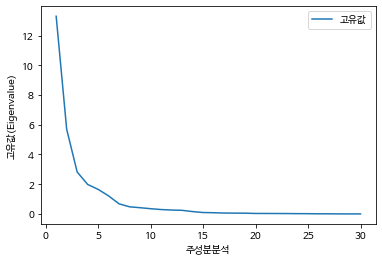

In [45]:
# Scree Plot
plt.plot(df_pca_stat["PrinNo"],df_pca_stat["EigenValues"], label="고유값")

# 그래프 label, legend 설정
plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분분석")
plt.legend(loc='best')

#### 그래프가 5에서 꺾이므로, 적정 주성분을 5개로 판단할 수 있다. 

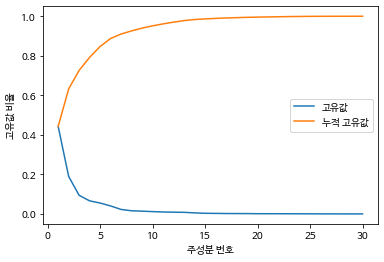

In [46]:
# 고유값 비율 그래프 생성
plt.plot(df_pca_stat['PrinNo'],df_pca_stat['EigenValueRatio'],label='고유값')

# 누적된 고유값 비율 그래프 생성
plt.plot(df_pca_stat['PrinNo'],df_pca_stat['CumEigenValueRatio'],label='누적 고유값')
plt.ylabel('고유값 비율')
plt.xlabel('주성분 번호')
plt.legend(loc='best')

### 4-8 주성분 분석 및 결과: 고유 벡터 확인 및 해석 

In [47]:
# 주성분 분석 데이터의 변수 이름
x_cols=pd.DataFrame({"Feature":df_raw_x.columns})

# 주성분 Prin1~6까지의 고유벡터 저장
# 전치결과 pd.DataFrame(pca.components_,columns=["Prin1"~"PrinN"], axis=1)
# 파이썬 PCA 부석 시 SVD 연산 방식의 차이 반영 (전치, 부호 변경)
df_eigenvector=pd.concat([x_cols,pd.DataFrame(pca.components_.T*-1,\
                        columns=['Prin'+str(i) for i in range(1,31)])],axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,...,Prin21,Prin22,Prin23,Prin24,Prin25,Prin26,Prin27,Prin28,Prin29,Prin30
0,mean radius,-0.219,0.234,0.009,-0.041,-0.038,-0.019,0.124,0.007,0.223,...,0.069,-0.073,0.099,-0.183,-0.019,0.129,0.132,-0.211,-0.211,0.702
1,mean texture,-0.104,0.060,-0.065,0.603,0.049,0.032,-0.011,-0.131,-0.113,...,-0.448,-0.095,0.001,0.099,0.085,0.025,0.017,0.000,0.011,0.000
2,mean perimeter,-0.228,0.215,0.009,-0.042,-0.037,-0.017,0.114,0.019,0.224,...,0.070,-0.075,0.040,-0.117,0.027,0.125,0.115,-0.084,-0.384,-0.690
3,mean area,-0.221,0.231,-0.029,-0.053,-0.010,0.002,0.052,-0.035,0.196,...,0.018,-0.098,-0.008,0.070,-0.210,-0.363,-0.467,0.273,0.423,-0.033
4,mean smoothness,-0.143,-0.186,0.104,-0.159,0.365,0.286,0.141,0.289,-0.006,...,0.119,-0.064,0.021,0.069,0.029,0.037,-0.070,-0.001,0.003,-0.005
5,mean compactness,-0.239,-0.152,0.074,-0.032,-0.012,0.014,-0.031,0.151,0.168,...,-0.193,0.098,-0.052,-0.104,0.397,-0.263,-0.098,0.005,0.041,0.045
6,mean concavity,-0.258,-0.060,-0.003,-0.019,-0.086,0.009,0.108,0.073,-0.041,...,-0.006,0.185,-0.325,0.045,-0.097,0.549,-0.365,-0.046,0.010,0.025
7,mean concave points,-0.261,0.035,0.026,-0.065,0.044,0.052,0.150,0.152,0.112,...,0.009,0.312,0.051,0.084,-0.186,-0.388,0.455,0.009,0.004,-0.001
8,mean symmetry,-0.138,-0.190,0.040,-0.067,0.306,-0.356,0.094,0.232,-0.256,...,0.087,0.018,0.051,0.019,-0.025,0.016,0.015,-0.001,0.008,-0.001
9,mean fractal dimension,-0.064,-0.367,0.023,-0.049,0.044,0.119,-0.296,0.177,0.124,...,0.076,-0.288,0.085,-0.133,-0.207,0.097,0.101,0.006,-0.007,-0.005


#### 주성분 1은 모든 변수들과 음의 상관관계를 가지며, 주성분 2는 변수들과의 상관성이 뚜렷한 경향성을 보이지 않는다. 주성분 3의 경우 에러- 변수들과는 음의 상관성을, 최악의- 변수들과는 음의 상관성을 보임을 알 수 있다. 

# 5. 주성분 상관/회귀분석 

### 5-1 상관관계

In [49]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,Prin10,...,Prin21,Prin22,Prin23,Prin24,Prin25,Prin26,Prin27,Prin28,Prin29,Prin30
Prin1,1.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,...,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0
Prin2,-0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
Prin3,0.0,0.0,1.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,...,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0
Prin4,-0.0,0.0,0.0,1.0,0.0,-0.0,0.0,0.0,-0.0,0.0,...,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0
Prin5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0
Prin6,0.0,0.0,-0.0,-0.0,0.0,1.0,-0.0,0.0,-0.0,-0.0,...,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0
Prin7,-0.0,0.0,0.0,0.0,0.0,-0.0,1.0,0.0,-0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0
Prin8,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,1.0,-0.0,-0.0,...,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0
Prin9,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,1.0,-0.0,...,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0
Prin10,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,1.0,...,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0


#### 주성분은 서로 독립이므로 상관계수가 0이다. 

### 5-3. 주성분 회귀분석

#### 다중선형 회귀 분석 : 원천 데이터 활용

In [53]:
# 원천 데이터에 절변 (const) 추가
df_raw_x_const=sm.add_constant(df_raw_x)

# 회귀 모델 생성
reg_model=sm.OLS(df_raw_y,df_raw_x)

# 회귀 모델 적합
reg_model=reg_model.fit()

# 모델 성능 확인 
print(reg_model.summary())

                                 OLS Regression Results                                
Dep. Variable:              diagnosis   R-squared (uncentered):                   0.853
Model:                            OLS   Adj. R-squared (uncentered):              0.844
Method:                 Least Squares   F-statistic:                              103.9
Date:                Thu, 19 Nov 2020   Prob (F-statistic):                   1.78e-202
Time:                        03:13:31   Log-Likelihood:                          18.089
No. Observations:                 569   AIC:                                      23.82
Df Residuals:                     539   BIC:                                      154.1
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

#### 다중 선형 회귀 분석: Scale 변환 데이터 활용

In [54]:
# Scale 변환 데이터에 절변 (const) 컬럼 추가
df_scaled_const=sm.add_constant(df_scaled)
reg_model=sm.OLS(df_raw_y,df_scaled_const)
reg_model=reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     61.53
Date:                Thu, 19 Nov 2020   Prob (F-statistic):          6.05e-153
Time:                        03:13:36   Log-Likelihood:                 29.650
No. Observations:                 569   AIC:                             2.699
Df Residuals:                     538   BIC:                             137.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

#### 다중 선형 주성분 회귀분석 : 주성분 점수(score) 데이터 활용

In [55]:
# Eigenvalue, Screeplot 기준으로 적정 주성분 선택
x_var=["Prin1","Prin2","Prin3","Prin4","Prin5"]

# 선택된 주성분 점수 데이터에 절편(const) 컬럼 추가
df_pca_const=sm.add_constant(df_pca[x_var])

# 회귀모델 생성
reg_model=sm.OLS(df_raw_y,df_pca_const)

# 회귀모델 적합
reg_model=reg_model.fit()

# 모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     270.1
Date:                Thu, 19 Nov 2020   Prob (F-statistic):          5.84e-147
Time:                        03:15:07   Log-Likelihood:                -45.826
No. Observations:                 569   AIC:                             103.7
Df Residuals:                     563   BIC:                             129.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3726      0.011     33.708      0.0

#### 전체 설명변수를 이용한 모델보다 5개 주성분을 이용한 휘귀모델의 설명력이 약 8% 저하 되었다. 주성분 회귀분석의 회귀계수는 모두 유의함을 알 수 있다. 

# 그래디언트 부스팅

In [56]:
# 데이터 구성:Series,DataFrame
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# export_graphviz:나무 구조 생성 및 저장
from sklearn.tree import export_graphviz

# graphviz:나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz

# 데이터 분할:train,test
from sklearn.model_selection import train_test_split

# 예측/회귀 Random Forest
from sklearn.ensemble import GradientBoostingRegressor

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 한글 깨짐 방지
import matplotlib.font_manager as fm 
font_list=[font.name for font in fm.fontManager.ttflist]
font_list
plt.rcParams['font.family']='NanumBarunGothic'

# 1. 데이터 불러오기 

In [58]:
df_raw=pd.read_csv('/home/piai/Downloads/3/Concrete.csv',engine='python')
df_raw.head()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### 1-1 역할 변수 지정 

In [63]:
# 목표변수,설명변수 데이터 지정
df_raw_y=df_raw['CONCRETE_COMPRESSIVE_STRENGTH']
df_raw_x=df_raw.drop('CONCRETE_COMPRESSIVE_STRENGTH',axis=1,inplace=False)

### 1-2 데이터 분할 

In [66]:
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
df_train_x,df_val_x,df_train_y,df_val_y=train_test_split(df_train_x,df_train_y,test_size=3/7,random_state=1234)
print('train data X size:{}'.format(df_train_x.shape))
print('train data Y size:{}'.format(df_train_y.shape))
print('validation data X size:{}'.format(df_val_x.shape))
print('validation data Y size:{}'.format(df_val_y.shape))
print('test data X size:{}'.format(df_test_x.shape))
print('test data Y size:{}'.format(df_test_y.shape))

train data X size:(412, 8)
train data Y size:(412,)
validation data X size:(309, 8)
validation data Y size:(309,)
test data X size:(309, 8)
test data Y size:(309,)


#### train, test 데이터를 7:3 비율로 분할하고 , train, validation 데이터를 4:3 비율로 분할 한다. 

# 2. 모델 생성

### 2-1 기본으로 모델 생성 

In [68]:
gb_uncustomized=GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x,df_train_y)
# Train 데이터 설명력
print('Score on training set:{:.3f}'.format(gb_uncustomized.score(df_train_x,df_train_y)))
# Test 데이터 설명력
print('Score on test set:{:.3f}'.format(gb_uncustomized.score(df_test_x,df_test_y)))

Score on training set:0.957
Score on test set:0.874


#### 모델의 설명력은 95.7%이고 데이트의 설명력은 87.4%이므로 모델은 과대적합되어 있다. 

### 2-2 현재 생성된 트리 모델의 옵션 확인

In [69]:
gb_uncustomized

GradientBoostingRegressor(random_state=1234)

### 2-3 n_estimators: 트리 수 변경에 따른 모델 성능 

In [70]:
# train 및 test 설명력 결과 저장
train_score=[]
val_score=[]

# n_estimatos:최대 깊이 변경
para_n_tree=[n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=v_n_estimators)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    val_score.append(gb.score(df_val_x,df_val_y))
    
# 결과 저장
df_score_n=pd.DataFrame()
df_score_n['Estimators']=para_n_tree
df_score_n['TrainScore']=train_score
df_score_n['ValScore']=val_score

# 모델 설명력 확인
df_score_n.round(3)

,Estimators,TrainScore,ValScore
0,10,0.666,0.565
1,20,0.827,0.718
2,30,0.885,0.781
3,40,0.911,0.804
4,50,0.926,0.815
5,60,0.936,0.823
6,70,0.943,0.831
7,80,0.948,0.833
8,90,0.953,0.837
9,100,0.957,0.838


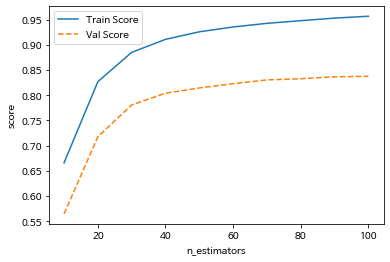

In [71]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree,train_score,linestyle='-',label='Train Score')
plt.plot(para_n_tree,val_score,linestyle='--',label='Val Score')
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

#### 트리수가 증가함에 따라 모델의 설명력은 지속적으로 향상된다. 꺽이는 지점을 고려해 n_estimators를 45 정한다.

### 2-4 min_sameples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [74]:
# train 및 test 설명력 결과 저장
train_score=[]
val_score=[]
# min_samples_leaf:잎사귀 최소 자료 수
para_leaf=[n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=45,\
                               min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    val_score.append(gb.score(df_val_x,df_val_y))
    
# 결과 저장
df_score_leaf=pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['ValScore']=val_score

# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,ValScore
0,1,0.919,0.810
1,2,0.919,0.815
2,3,0.919,0.814
3,4,0.919,0.815
4,5,0.921,0.816
5,6,0.915,0.816
6,7,0.914,0.812
7,8,0.915,0.809
8,9,0.912,0.816
9,10,0.910,0.806


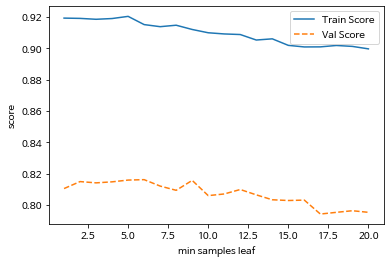

In [75]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf,train_score,linestyle='-',label='Train Score')
plt.plot(para_leaf,val_score,linestyle='--',label='Val Score')
plt.ylabel('score')
plt.xlabel('min samples leaf')
plt.legend()

#### test데이터의 성능을 고려하여 9를 선택한다. 

### 2-5. min_samepls_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능 

In [76]:
# train 및 test 설명력 결과 저장
train_score=[]
val_score=[]
# min_samples_split:분리 노드의 최소 자료 수
para_split=[n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=45,\
                               min_samples_leaf=9,min_samples_split=v_min_samples_split)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    val_score.append(gb.score(df_val_x,df_val_y))
    
# 결과 저장
df_score_split=pd.DataFrame()
df_score_split['MinSamplesSplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['ValScore']=val_score

# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,ValScore
0,4,0.912,0.816
1,6,0.912,0.816
2,8,0.912,0.816
3,10,0.912,0.816
4,12,0.912,0.816
5,14,0.912,0.816
6,16,0.912,0.816
7,18,0.912,0.816
8,20,0.910,0.817
9,22,0.910,0.816


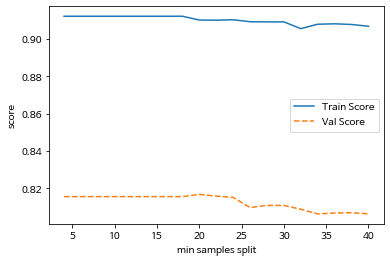

In [77]:
# 모델 설명력 그래프 확인
plt.plot(para_split,train_score,linestyle='-',label='Train Score')
plt.plot(para_split,val_score,linestyle='--',label='Val Score')
plt.ylabel('score')
plt.xlabel('min samples split')
plt.legend()

#### 분리 노드 최소 자료 수 증가에 따라 모델의 설명력은 감소한다. 이를 고려하여 20을 선택한다. 

###  2-6. max_depth:최대 깊이 변경에 따른 모델 성능

In [78]:
# train 및 test 설명력 결과 저장
train_score=[]
val_score=[]
# max_depth:최대 깊이 변경
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=45,\
                               min_samples_leaf=9,min_samples_split=20,\
                               max_depth=v_max_depth)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    val_score.append(gb.score(df_val_x,df_val_y))
    
# 결과 저장
df_score_depth=pd.DataFrame()
df_score_depth['Depth']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['ValScore']=val_score

# 모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,ValScore
0,1,0.733,0.638
1,2,0.856,0.770
2,3,0.910,0.817
3,4,0.946,0.833
4,5,0.966,0.832
5,6,0.974,0.844
6,7,0.978,0.839
7,8,0.980,0.853
8,9,0.981,0.837
9,10,0.982,0.841


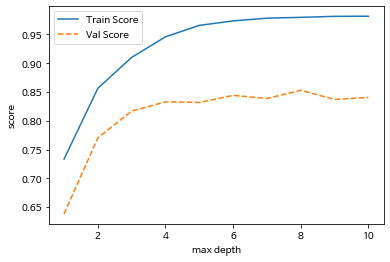

In [79]:
# 모델 설명력 그래프 확인
plt.plot(para_depth,train_score,linestyle='-',label='Train Score')
plt.plot(para_depth,val_score,linestyle='--',label='Val Score')
plt.ylabel('score')
plt.xlabel('max depth')
plt.legend()

#### 최대 깊이 증가에 따라 모델의 설명력은 증가하고 test 데이터의 성능 변화를 고려하여 8을 선택한다. 

### 2-7. learning_rate : 학습률 변경에 따른 모델 성능 

In [ ]:
# train 및 test 설명력 결과 저장
train_score=[]
val_score=[]
# learning rate:학습률 변경 0.1~0.9 변경
para_lr=[lr*0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=45,\
                               min_samples_leaf=9,min_samples_split=20,\
                                 max_depth=8,learning_rate=v_learning_rate)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    val_score.append(gb.score(df_val_x,df_val_y))
    
# 결과 저장
df_score_lr=pd.DataFrame()
df_score_lr['LearningRate']=para_lr
df_score_lr['TrainScore']=train_score
df_score_lr['ValScore']=val_score

# 모델 설명력 확인
df_score_lr.round(3)

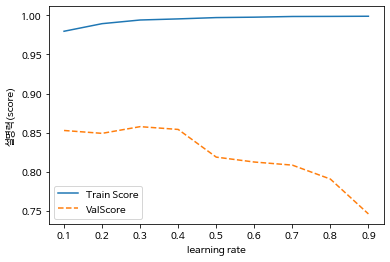

In [81]:
#모델 설명력 그래프 확인
plt.plot(para_lr, train_score, linestyle = "-", label = 'Train Score')
plt.plot(para_lr, val_score, linestyle = "--", label = 'ValScore')
plt.ylabel('설명력(score)')
plt.xlabel('learning rate')
plt.legend()

#### train/test의 정확도 변화를 고려하여 0.4를 선택한다.

# 3. 최종 모델 생성 

In [83]:
gb_final=GradientBoostingRegressor(min_samples_leaf=9,min_samples_split=20,\
                                max_depth=8,random_state=1234,n_estimators=45,\
                                  learning_rate=0.4)
gb_final.fit(df_train_x,df_train_y)
# Train 데이터 설명력
print('Score on training set:{:.3f}'.format(gb_final.score(df_train_x,df_train_y)))
# Test 데이터 설명력
print('Score on test set:{:.3f}'.format(gb_final.score(df_test_x,df_test_y)))

Score on training set:0.995
Score on test set:0.878


#### 모델의 설명력은 train 99.5%이고 test가 87.8%이다. 

# 4. 결론

### 4-1 설명 변수의 중요도 

In [85]:
# 변수명 저장
v_feature_name=df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=gb_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance',ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
7,AGE,0.334
0,CEMENT,0.324
3,WATER,0.156
1,BLAST_FURNACE_SLAG,0.072
4,SUPERPLASTICIZER,0.041
5,COARSE_AGGREGATE,0.027
6,FINE_AGGREGATE,0.026
2,FLY_ASH,0.020


Text(0, 0.5, '변수')

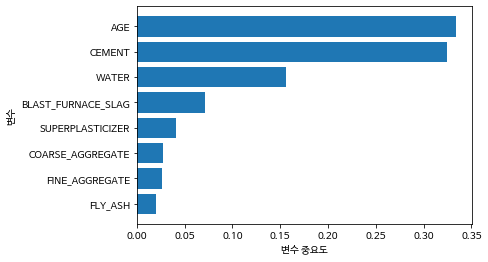

In [86]:
# 설명변수 중요도 그래프
df_importance.sort_values('Importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

#### 설명병수는 나이, 시멘트, 물 순의 순서를가진다. 

# 5. 모델 평가

### 0. 모듈 불러오기 

In [87]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### 5-1 평가함수 정의 

In [88]:
# RMSE:root mean squared error 함수
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

# MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [89]:
# 예측
gb_y_pred = gb_final.predict(df_test_x)

# 평가
print('mse:',mean_squared_error(df_test_y, gb_y_pred))
print('mae:',mean_absolute_error(df_test_y, gb_y_pred))

mse: 31.852299316534705
mae: 3.9290135498882557


#### MSE(평균제곱오차)는 31.85, MAE(평균절대오차)는 3.93이다. 